# A Primer in Econometric Theory

* [John Stachurski](http://johnstachurski.net/index.html)

## Nikkei returns and normality

Two figures from chapter 10, showing the comparison of the ECDF of Nikkei returns data against the standard normal CDF, as well as the histogram of returns against the density.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv('../data/nikkei.csv', names=['date', 'price'], header=0, na_values='.')
df = df.dropna()
returns = df.price.pct_change()
returns = returns.dropna()

# Compute standardized returns
r = (returns - returns.mean()) / returns.std()

r = r.dropna()


1.52061776766


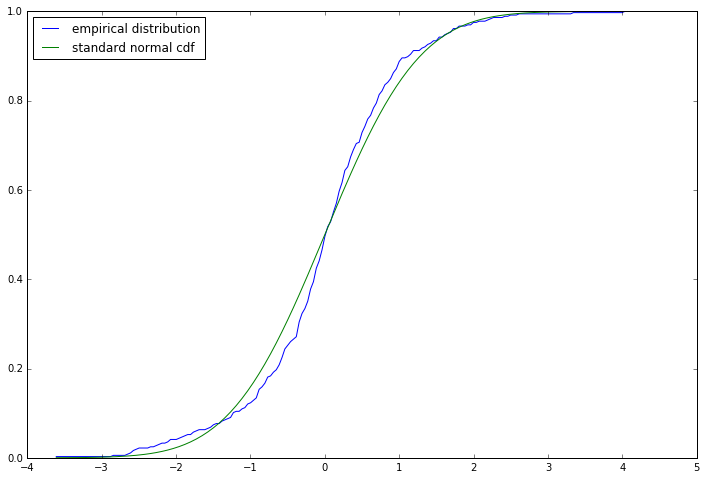

In [3]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from scipy.stats import norm


rmin = r.min()
rmax = r.max()
rgrid = np.linspace(rmin, rmax, 200)

e = qe.ecdf.ECDF(r)

temp = norm.cdf(rgrid) - [e(rg) for rg in rgrid]
T = np.sqrt(len(r)) * np.max(np.abs(temp))
print(T)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(rgrid, [e(rg) for rg in rgrid], label='empirical distribution')
ax.plot(rgrid, norm.cdf(rgrid), label='standard normal cdf')

ax.legend(loc='upper left')

plt.show()

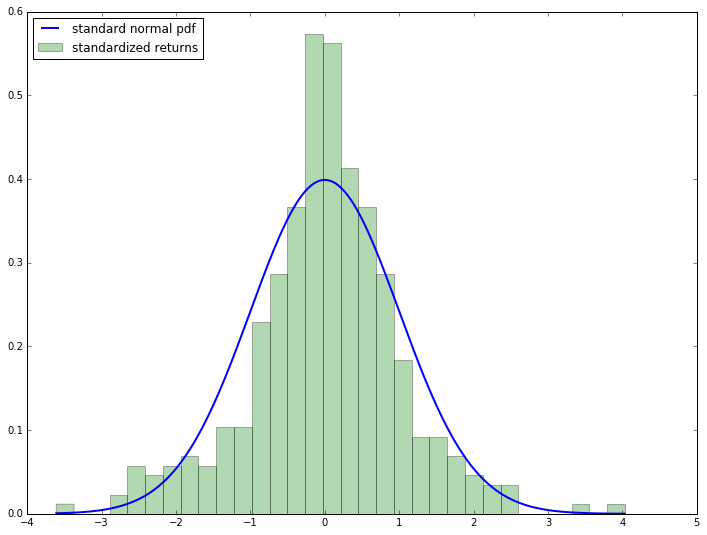

In [4]:

import numpy as np
import quantecon as qe
from scipy.stats import norm


rmin = r.min()
rmax = r.max()
rgrid = np.linspace(rmin, rmax, 200)

fig, ax = plt.subplots(figsize=(12, 9))

ax.plot(rgrid, norm.pdf(rgrid), label='standard normal pdf', lw=2)

ax.hist(r.values, bins=32, normed=True, label='standardized returns', alpha=0.3)

ax.legend(loc='upper left')

plt.show()
